In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Create a Model with a input_shape of (75, 75, 3) and a learning rate of 1-e5

In [3]:
#load base model

base_model = keras.applications.InceptionV3(
                    weights='imagenet',
                    input_shape=(75, 75, 3),
                    include_top=False)

In [4]:
# Freeze base model
base_model.trainable = False

In [22]:
# add layers to model

inputs = keras.Input(shape = (75, 75, 3))

x = base_model(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(14, activation='relu')(x)

outputs = keras.layers.Dense(14, activation='softmax')(x)

model = keras.Model(inputs, outputs)

In [23]:
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 14)                28686     
_________________________________________________________________
dense_7 (Dense)              (None, 14)                210       
Total params: 21,831,680
Trainable params: 21,797,248
Non-trainable params: 34,432
_________________________________________________________________


In [10]:
model.compile(loss = keras.losses.CategoricalCrossentropy(),
              metrics = keras.metrics.CategoricalAccuracy())

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(samplewise_center=True,
    rotation_range=10,
    zoom_range=0.1, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True,  
    vertical_flip=True)

test_gen = ImageDataGenerator(samplewise_center=True)

In [13]:
train = train_gen.flow_from_directory(
    '../dataset/Train',
    target_size=(75, 75),
    color_mode="rgb",
    class_mode="categorical")


test = test_gen.flow_from_directory(
    '../dataset/Test',
    target_size=(75, 75),
    color_mode="rgb",
    class_mode="categorical")

Found 21044 images belonging to 14 classes.
Found 6738 images belonging to 14 classes.


In [14]:
train.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshcucumber': 2,
 'freshokra': 3,
 'freshoranges': 4,
 'freshpotato': 5,
 'freshtomato': 6,
 'rottenapples': 7,
 'rottenbanana': 8,
 'rottencucumber': 9,
 'rottenokra': 10,
 'rottenoranges': 11,
 'rottenpotato': 12,
 'rottentomato': 13}

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

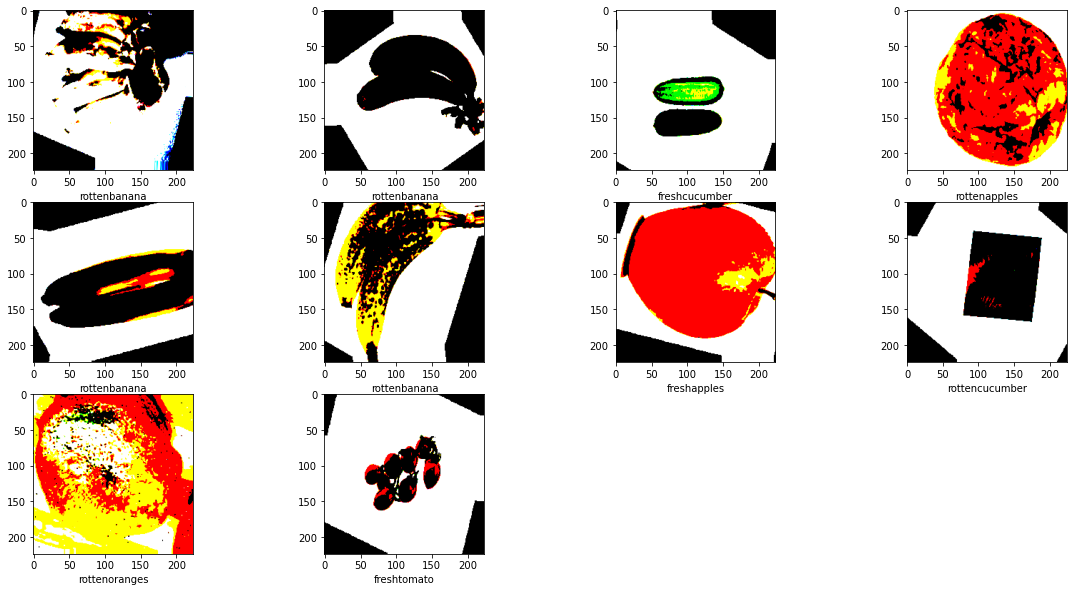

In [10]:
import matplotlib.pyplot as plt

# Encode the classes
classes = train.class_indices
classes = {indx: c for c, indx in classes.items()}


#PLotting some images 
images, labels=train.next()
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(3, 4, i+1)
    plt.imshow(images[i])
    #plt.axis('off')
    plt.xlabel(classes[np.argmax(labels[i])])

In [15]:
callbacks = keras.callbacks.EarlyStopping(patience = 1, 
                                          monitor='val_loss',
                                          restore_best_weights=True)


model.fit(train,
          validation_data = test,
          steps_per_epoch = train.samples/train.batch_size,
          validation_steps= test.samples/test.batch_size,
          epochs=5,
          callbacks= [callbacks])

Epoch 1/5
657/657 [==============================] - 149s 222ms/step - loss: 3.0084 - categorical_accuracy: 0.1446 - val_loss: 2.5408 - val_categorical_accuracy: 0.1466
Epoch 2/5
657/657 [==============================] - 126s 191ms/step - loss: 2.4528 - categorical_accuracy: 0.1543 - val_loss: 2.5346 - val_categorical_accuracy: 0.1466
Epoch 3/5
657/657 [==============================] - 129s 197ms/step - loss: 2.4339 - categorical_accuracy: 0.1544 - val_loss: 2.5453 - val_categorical_accuracy: 0.1466


In [16]:
# Unfreeze the base model
base_model.trainable = True

# Compile the model with a low learning rate
model.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

In [17]:
model.fit(train,
          validation_data= test,
          steps_per_epoch= train.samples/train.batch_size,
          validation_steps= test.samples/test.batch_size,
          epochs=5,
          callbacks= [callbacks])

Epoch 1/5
657/657 [==============================] - 300s 450ms/step - loss: 2.3428 - categorical_accuracy: 0.1825 - val_loss: 2.3851 - val_categorical_accuracy: 0.2094
Epoch 2/5
657/657 [==============================] - 614s 934ms/step - loss: 1.9734 - categorical_accuracy: 0.3968 - val_loss: 1.8418 - val_categorical_accuracy: 0.4417
Epoch 3/5
657/657 [==============================] - 879s 1s/step - loss: 1.4986 - categorical_accuracy: 0.5153 - val_loss: 1.4176 - val_categorical_accuracy: 0.6149
Epoch 4/5
657/657 [==============================] - 818s 1s/step - loss: 1.0890 - categorical_accuracy: 0.7162 - val_loss: 1.0115 - val_categorical_accuracy: 0.7326
Epoch 5/5
657/657 [==============================] - 700s 1s/step - loss: 0.7750 - categorical_accuracy: 0.8041 - val_loss: 0.6777 - val_categorical_accuracy: 0.8424


In [18]:
model.evaluate(test, steps= test.samples/test.batch_size)

210/210 [==============================] - 28s 135ms/step - loss: 0.6777 - categorical_accuracy: 0.8424


[0.6776805520057678, 0.8423864841461182]

Update input_shape to (150, 150, 3)

In [35]:
#load base model - increase trainable parameters

base_model_2 = keras.applications.InceptionV3(
                    weights='imagenet',
                    input_shape=(150, 150, 3),
                    include_top=False)

In [36]:
inputs_2 = keras.Input(shape = (150, 150, 3))

x = base_model_2(inputs_2)
x = keras.layers.GlobalAveragePooling2D()(x)
#x = keras.layers.Dense(150, activation='relu')(x)

outputs_2 = keras.layers.Dense(14, activation='softmax')(x)

model_2 = keras.Model(inputs_2, outputs_2)

In [37]:
model_2.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 150, 150, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_8 ( (None, 2048)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 14)                28686     
Total params: 21,831,470
Trainable params: 21,797,038
Non-trainable params: 34,432
_________________________________________________________________


In [41]:
# Unfreeze the base model
base_model.trainable = True

# Compile the model with a low learning rate
model_2.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

In [42]:
callbacks = keras.callbacks.EarlyStopping(patience = 1, 
                                          monitor='val_loss',
                                          restore_best_weights=True)


model_2.fit(train,
          validation_data = test,
          steps_per_epoch = train.samples/train.batch_size,
          validation_steps= test.samples/test.batch_size,
          epochs=5,
          callbacks= [callbacks])

Epoch 1/5
657/657 [==============================] - 332s 497ms/step - loss: 1.0022 - categorical_accuracy: 0.7011 - val_loss: 0.8929 - val_categorical_accuracy: 0.7566
Epoch 2/5
657/657 [==============================] - 358s 544ms/step - loss: 0.6657 - categorical_accuracy: 0.7907 - val_loss: 0.5942 - val_categorical_accuracy: 0.8213
Epoch 3/5
657/657 [==============================] - 298s 452ms/step - loss: 0.5083 - categorical_accuracy: 0.8328 - val_loss: 0.4698 - val_categorical_accuracy: 0.8602
Epoch 4/5
657/657 [==============================] - 319s 485ms/step - loss: 0.4162 - categorical_accuracy: 0.8611 - val_loss: 0.3483 - val_categorical_accuracy: 0.8899
Epoch 5/5
657/657 [==============================] - 316s 481ms/step - loss: 0.3617 - categorical_accuracy: 0.8794 - val_loss: 0.3170 - val_categorical_accuracy: 0.9055


In [43]:
model_2.evaluate(test, steps= test.samples/test.batch_size)

210/210 [==============================] - 24s 115ms/step - loss: 0.3170 - categorical_accuracy: 0.9055


[0.31700247526168823, 0.9054615497589111]

Update input_shape to (300, 300, 3) and increase learning rate to 1e-3

In [44]:
#load base model - increase trainable parameters

base_model_3 = keras.applications.InceptionV3(
                    weights='imagenet',
                    input_shape=(300, 300, 3),
                    include_top=False)

In [45]:
inputs_3 = keras.Input(shape = (300, 300, 3))

x = base_model_3(inputs_3)
x = keras.layers.GlobalAveragePooling2D()(x)
#x = keras.layers.Dense(150, activation='relu')(x)

outputs_3 = keras.layers.Dense(14, activation='softmax')(x)

model_3 = keras.Model(inputs_3, outputs_3)

In [46]:
model_3.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 300, 300, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_9 ( (None, 2048)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 14)                28686     
Total params: 21,831,470
Trainable params: 21,797,038
Non-trainable params: 34,432
_________________________________________________________________


In [48]:
# Unfreeze the base model
base_model_3.trainable = True

# Compile the model with a low learning rate
model_3.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-3),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

In [49]:
callbacks = keras.callbacks.EarlyStopping(patience = 1, 
                                          monitor='val_loss',
                                          restore_best_weights=True)


model_3.fit(train,
          validation_data = test,
          steps_per_epoch = train.samples/train.batch_size,
          validation_steps= test.samples/test.batch_size,
          epochs=5,
          callbacks= [callbacks])

Epoch 1/5
657/657 [==============================] - 322s 483ms/step - loss: 1.0130 - categorical_accuracy: 0.6898 - val_loss: 2.4212 - val_categorical_accuracy: 0.6717
Epoch 2/5
657/657 [==============================] - 336s 510ms/step - loss: 0.7306 - categorical_accuracy: 0.7750 - val_loss: 7.8337 - val_categorical_accuracy: 0.1680


Rerun the model but decrease the learning rate to 1e-4

In [50]:
#load base model - increase trainable parameters

base_model_4 = keras.applications.InceptionV3(
                    weights='imagenet',
                    input_shape=(300, 300, 3),
                    include_top=False)

In [51]:
inputs_4 = keras.Input(shape = (300, 300, 3))

x = base_model_4(inputs_4)
x = keras.layers.GlobalAveragePooling2D()(x)
#x = keras.layers.Dense(150, activation='relu')(x)

outputs_4 = keras.layers.Dense(14, activation='softmax')(x)

model_4 = keras.Model(inputs_4, outputs_4)

In [53]:
model_4.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 300, 300, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 8, 8, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_10  (None, 2048)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 14)                28686     
Total params: 21,831,470
Trainable params: 21,797,038
Non-trainable params: 34,432
_________________________________________________________________


In [54]:
# Unfreeze the base model
base_model_4.trainable = True

# Compile the model with a low learning rate
model_4.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-4),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

In [56]:
callbacks = keras.callbacks.EarlyStopping(patience = 1, 
                                          monitor='val_loss',
                                          restore_best_weights=True)


model_4.fit(train,
          validation_data = test,
          steps_per_epoch = train.samples/train.batch_size,
          validation_steps= test.samples/test.batch_size,
          epochs=5,
          callbacks= [callbacks])

Epoch 1/5
657/657 [==============================] - 313s 469ms/step - loss: 0.7062 - categorical_accuracy: 0.7759 - val_loss: 0.2995 - val_categorical_accuracy: 0.9050
Epoch 2/5
657/657 [==============================] - 320s 487ms/step - loss: 0.2869 - categorical_accuracy: 0.9051 - val_loss: 0.1808 - val_categorical_accuracy: 0.9329
Epoch 3/5
657/657 [==============================] - 329s 500ms/step - loss: 0.2018 - categorical_accuracy: 0.9298 - val_loss: 0.6147 - val_categorical_accuracy: 0.9132


In [57]:
model_4.evaluate(test, steps= test.samples/test.batch_size)

210/210 [==============================] - 24s 114ms/step - loss: 0.1808 - categorical_accuracy: 0.9329


[0.1807674616575241, 0.9329177737236023]

Rerun the model but decrease learning rate to 1e-5

In [58]:
# Compile the model with a low learning rate
model_4.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

model_4.fit(train,
          validation_data = test,
          steps_per_epoch = train.samples/train.batch_size,
          validation_steps= test.samples/test.batch_size,
          epochs=5,
          callbacks= [callbacks])

Epoch 1/5
657/657 [==============================] - 327s 490ms/step - loss: 0.1845 - categorical_accuracy: 0.9368 - val_loss: 0.1286 - val_categorical_accuracy: 0.9535
Epoch 2/5
657/657 [==============================] - 335s 509ms/step - loss: 0.1616 - categorical_accuracy: 0.9439 - val_loss: 0.1191 - val_categorical_accuracy: 0.9553
Epoch 3/5
657/657 [==============================] - 335s 510ms/step - loss: 0.1388 - categorical_accuracy: 0.9512 - val_loss: 0.1135 - val_categorical_accuracy: 0.9598
Epoch 4/5
657/657 [==============================] - 319s 485ms/step - loss: 0.1336 - categorical_accuracy: 0.9547 - val_loss: 0.0972 - val_categorical_accuracy: 0.9650
Epoch 5/5
657/657 [==============================] - 335s 509ms/step - loss: 0.1205 - categorical_accuracy: 0.9574 - val_loss: 0.0858 - val_categorical_accuracy: 0.9714


In [59]:
model_4.evaluate(test, steps= test.samples/test.batch_size)

210/210 [==============================] - 24s 112ms/step - loss: 0.0858 - categorical_accuracy: 0.9714


[0.08575436472892761, 0.9713565111160278]

Train/Validation/Test Split

In [61]:
train_gen = ImageDataGenerator(samplewise_center=True,
    rotation_range=10,
    zoom_range=0.1, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=True,  
    vertical_flip=True,
    validation_split= 0.25)

In [62]:
train = train_gen.flow_from_directory(
    '../dataset/Train',
    target_size = (75, 75),
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'training')

validate = train_gen.flow_from_directory(
    '../dataset/Train',
    target_size = (75, 75),
    color_mode = 'rgb',
    class_mode = 'categorical',
    subset = 'validation')


test = test_gen.flow_from_directory(
    '../dataset/Test',
    target_size = (75, 75),
    color_mode = "rgb",
    class_mode = "categorical")

Found 15787 images belonging to 14 classes.
Found 5257 images belonging to 14 classes.
Found 6738 images belonging to 14 classes.


In [63]:
# Compile the model with a low learning rate
model_4.compile(optimizer=keras.optimizers.Adam(learning_rate = 1e-5),
               loss=keras.losses.CategoricalCrossentropy(),
               metrics=[keras.metrics.CategoricalAccuracy()])

model_4.fit(train,
          validation_data = validate,
          steps_per_epoch = train.samples/train.batch_size,
          validation_steps= validate.samples/validate.batch_size,
          epochs=5,
          callbacks= [callbacks])

Epoch 1/5
493/493 [==============================] - 241s 481ms/step - loss: 0.1070 - categorical_accuracy: 0.9629 - val_loss: 0.1215 - val_categorical_accuracy: 0.9576
Epoch 2/5
493/493 [==============================] - 263s 532ms/step - loss: 0.1099 - categorical_accuracy: 0.9638 - val_loss: 0.1626 - val_categorical_accuracy: 0.9446


In [65]:
model_4.evaluate(test)

211/211 [==============================] - 25s 116ms/step - loss: 0.0869 - categorical_accuracy: 0.9720


[0.08686290681362152, 0.971950113773346]